# Can we guess if Formal Education or contributing to opensource or working in which part of the world earns us more salary?

I am using Stack overflow Annual Developer survey Data from 2017 to 2020. You can find it [here](https://insights.stackoverflow.com/survey).  
If you are using kaggle then you can find the data [here](https://www.kaggle.com/haakakak/stack-overflow-developer-surveys-20152020#).

# Business understanding

In this analysis, I want to concentrate/ask 4 Questions, and try to reach to Solution with Data I have.  
Data -> Question -> Solution.


Questions?
1. [Is Formal Education necessary to become Professional Developer?](#Question1)
2. [As a Software engineer, Is it better to work in India or move to Western countries?](#Question2)
3. [Which country has the most number of developers in last 4 years? and where does India stand in terms of total number of developers?](#Question3)
4. [Will you earn more salary if you contribute to open source?](#Question4)

Import all the libraries required in one cell.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Python data visualization library based on matplotlib
import matplotlib.pyplot as plt # plotting library for the Python programming language
import math
from matplotlib import cm # for Builtin colormaps
%matplotlib inline

cmap = cm.get_cmap('prism') # Colour map

# Data Understanding

We have 2 datasets every year.  
For example year 2020  
df_2020: It consist entire dataset
df_2020_Schema: It consist of column name from df_2020 and question asked for that column to fill the details in survey

Let us look at what we understand from data for each question in the respective section.

In [2]:
df_2020 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_public.csv',low_memory=False)
df_2020_Schema = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_schema.csv',low_memory=False)

df_2019 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2019/survey_results_public.csv',low_memory=False)
df_2019_Schema = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2019/survey_results_schema.csv',low_memory=False)

df_2018 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2018/survey_results_public.csv',low_memory=False)
df_2018_Schema = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2018/survey_results_schema.csv',low_memory=False)

df_2017 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_public.csv',low_memory=False)
df_2017_Schema = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_schema.csv',low_memory=False)

# 1. Is Formal Education necessary to become Professional Developer? <a name="Question1"></a>

To make this analysis, required column are present only in 2020 dataset, so I am considering only 2020 dataset for this question.

In [3]:
def plot_bar_chart(df, column, title):
    '''
    Displays a horizontal bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    Using this function we can plot bar chart easily and set scale of percentage for each column
    
    '''
    (df[column].value_counts(normalize=True)).plot(kind="barh",cmap=cmap);
    plt.title(title);

plotting column 'NEWEdImpt' which tells importance of formal education, and checking count for each answer.

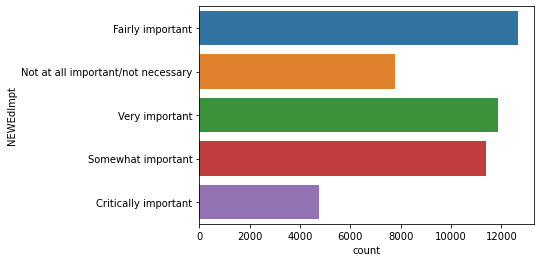

In [4]:
# countplot is used to plot the counts of observations in each categorical bin using bars
sns.countplot(y='NEWEdImpt',data=df_2020);

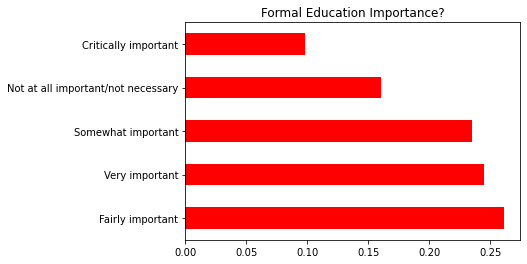

In [5]:
# plot using plot_bar_chart function
plot_bar_chart(df_2020, "NEWEdImpt", "Formal Education Importance?")

In [6]:
# Percentage of each value in NEWEdImpt column
df_2020.NEWEdImpt.value_counts(normalize=True)

Fairly important                      0.261508
Very important                        0.244836
Somewhat important                    0.234974
Not at all important/not necessary    0.160631
Critically important                  0.098050
Name: NEWEdImpt, dtype: float64

- Almost 85% of the respondents that are professional developers feel that formal education is at least somewhat important, 
- which is contrary to the popular idiom that you don't need formal education to become a developer. 
- However, almost 16% believe that it is not at all important or necessary.

To get fare point of view we will compare Formal Education importance with Salary they earn.

We dont want to manipulate our decision with everyone's opinion so I am considering only Professional developer.


For handling with missing values I am droping all the rows which doesnt have NEWEdImpt and Salary.

Two reason for dropping
- I can afford to do this because I have huge data left after this
- Imputing data for salary may manipulate the opinion about formal education.

In [7]:
# Considering only Professional developer
formalEdu_salary = df_2020[df_2020['MainBranch'] == 'I am a developer by profession']#
#drop all the rows with ConvertedComp,NEWEdImpt missing
formalEdu_salary = formalEdu_salary.dropna(subset=['ConvertedComp','NEWEdImpt'])
formalEdu_salary.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
13,14,I am a developer by profession,Yes,27.0,13,Yearly,66000.0,66000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Vue.js,Angular;Vue.js,Just as welcome now as I felt last year,40.0,5,1


In [8]:
# groupby is used to Group DataFrame using a Series of columns
# finding mean of salary
formalEdu_salary_2 = formalEdu_salary.groupby('NEWEdImpt', as_index=False)['ConvertedComp'].mean()
formalEdu_salary_2.head()

,NEWEdImpt,ConvertedComp
0,Critically important,105496.345912
1,Fairly important,96621.027680
2,Not at all important/not necessary,108257.050576
3,Somewhat important,104235.793187
4,Very important,103334.350343


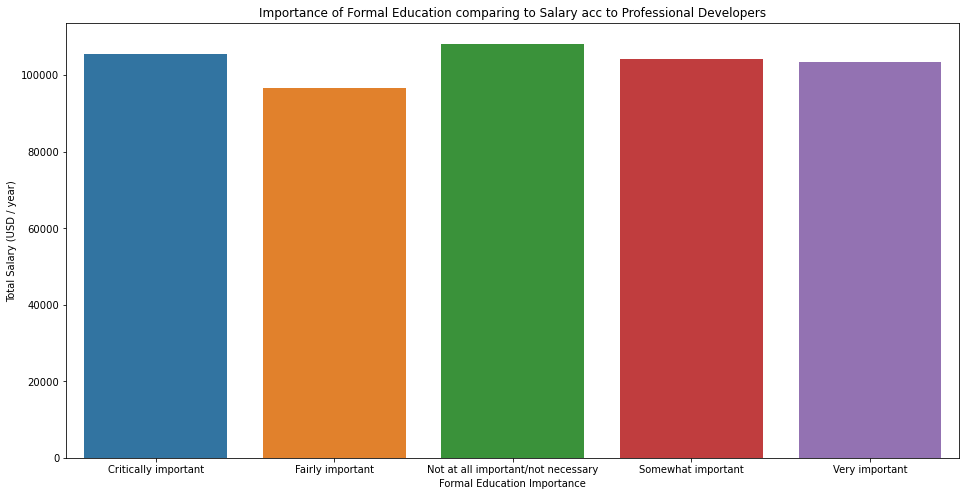

In [9]:
plt.figure(figsize=(16, 8))
sns.barplot(data=formalEdu_salary_2, x='NEWEdImpt', y='ConvertedComp')
plt.title('Importance of Formal Education comparing to Salary acc to Professional Developers')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Formal Education Importance')
plt.show()

## Evaluation

This means that Professional developers with different opinion about formal education earn pretty much the same.  
Professional developers who think Formal education is not needed earn comparatively higher then professional developers feel that formal education is important, but they are only 16%.  
Remaining 85% of the respondents that are professional developers feel that formal education is at least somewhat important and earn comparatively same. 

This doesnt mean people cannot become professional developers and earn competitive salary, certainly is possible but chances are just 16%

This plot was to see if there is a huge difference in salary of Professional developer with and without formal education. 

Since there is no huge difference, going with majority I conclude that to become Professional developer and earn competitive salary it is better to complete formal education.

# 2. As a Software engineer, Is it better to work in India or move to Western countries? <a name="Question2"></a>

To make this analysis of this question, required column are present only in 2017 and 2019 dataset, so I am considering 2017,2019 dataset for this question. 

Useful Column for this analysis from 2017 dataset
* Country: Country they are living
* YearsCodedJob: Years they are coding
* EmploymentStatus: Their employment status
* Salary: Their Salary
* JobSatisfaction & CareerSatisfaction: Are their satisfy their job and career

Useful Column for this analysis from 2019 dataset
* Country: Country they are living
* YearsCode: Years they are coding
* Employment: Their employment status
* ConvertedComp: Their Salary

I am considering only employed full-time professional developer.

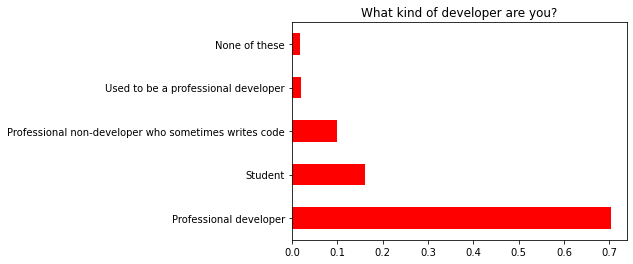

In [10]:
# plot using function plot_bar_chart
plot_bar_chart(df_2017, "Professional", "What kind of developer are you?")

For categorical variables "Country", I seperate them into three sectors: 
* western, 
* Indian
* other.

The following code define the lists of related countries and create a new column to identify whether that person lives in the west or in India.

In [11]:
def handling_country(df):
    '''
    
    Return a dataframe with country seperate into west and east
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column west_or_india
    
    '''
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, indian and other
    # The following lists define the countries to western and indian
    western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    indian = ['India']
    
    #Add a new catagory seperating to western and indian
    df['west_or_india'] = df['Country'].apply(lambda x: 'western' if x in western else ('indian' if x in indian else 'other'))
    
    return df

In [12]:
# create a new column to identify whether that person lives in the west or in India.
df_2017 = handling_country(df_2017)

In [13]:
useful_columns_2017 = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_india', 'Overpaid']

# query is used to Query the columns of a DataFrame with a boolean expression
useful_df_2017 = pd.DataFrame(df_2017.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns_2017]

useful_df_2017

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,west_or_india,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.000000,western,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,western,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,other,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,western,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.000000,western,Somewhat underpaid
...,...,...,...,...,...,...,...,...,...,...
51382,France,1 to 2 years,Employed full-time,9.0,5.0,I am actively looking for a job,0.0,32258.064516,western,Somewhat underpaid
51384,United States,8 to 9 years,Employed full-time,7.0,5.0,"I'm not actively looking, but I am open to new...",0.0,NaN,western,NaN
51386,Romania,3 to 4 years,Employed full-time,7.0,4.0,"I'm not actively looking, but I am open to new...",2.0,NaN,other,NaN
51387,United States,1 to 2 years,Employed full-time,7.0,3.0,I am actively looking for a job,5.0,58000.000000,western,Greatly underpaid


In [14]:
# group the column based on new created column west_or_india and yearscoded
west_or_india_2017 = useful_df_2017.groupby(['west_or_india','YearsCodedJob']).mean()
west_or_india_2017

CareerSatisfaction  JobSatisfaction  \
west_or_india YearsCodedJob                                           
indian        1 to 2 years                6.582656         5.848238   
              10 to 11 years              7.520000         6.280000   
              11 to 12 years              7.166667         6.222222   
              12 to 13 years              7.333333         5.833333   
              13 to 14 years              7.333333         7.666667   
...                                            ...              ...   
western       6 to 7 years                7.644114         7.177267   
              7 to 8 years                7.532209         7.179724   
              8 to 9 years                7.558304         7.072438   
              9 to 10 years               7.476000         6.988000   
              Less than a year            7.811526         7.648438   

                                HoursPerWeek        Salary  
west_or_india YearsCodedJob                                 
indian        1 to 2 years          5.925581   5738.765281  
              10 to 11 years        2.833333  22069.079430  
              11 to 12 years        5.125000  26798.928204  
              12 to 13 years        4.222222  36558.508295  
              13 to 14 years       40.000000  35952.870357  
...                                      ...           ...  
western       6 to 7 years          2.211039  69648.807261  
              7 to 8 years          2.138060  70236.572056  
              8 to 9 years          2.096491  76314.628263  
              9 to 10 years         2.148026  74142.281505  
              Less than a year      1.818627  47639.855006  

[62 rows x 4 columns]

In [15]:
def handling_yearscodedjob(df):
    """
    
    Convert the working year to integer
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodedJob column becomes numeric so that we can measure
    
    """
    year_map_2017 = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map_2017[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [16]:
#Convert the working year to integer by mapping
west_or_india_2017_comparison = handling_yearscodedjob(west_or_india_2017)
# sort based on years of coding
west_or_india_2017_comparison = west_or_india_2017_comparison.sort_values(by='YearsCodedJob')
west_or_india_2017_comparison

,west_or_india,YearsCodedJob,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
61,western,0,7.811526,7.648438,1.818627,47639.855006
40,other,0,7.102362,6.815686,3.152542,12798.906854
19,indian,0,6.611111,6.033333,5.711340,7201.297612
41,western,1,7.585460,7.152713,2.216606,48332.625897
20,other,1,7.453355,6.765189,3.838323,15930.110008
...,...,...,...,...,...,...
9,indian,19,7.400000,7.400000,0.000000,16150.345030
30,other,19,7.472222,6.916667,3.526316,47206.186787
53,western,20,7.851955,7.332635,2.285470,103337.295829
11,indian,20,7.500000,4.500000,0.000000,3171.340479


In [17]:
# index are set based on YearsCodedJob value
west_or_india_2017_comparison.set_index('YearsCodedJob', inplace=True)


In [18]:
# create a new column to identify whether that person lives in the west or in India.
df_2019 = handling_country(df_2019)

In [19]:
useful_columns_2019 = ['Country', 'YearsCode', 'Employment','ConvertedComp', 'west_or_india']
# query is used to Query the columns of a DataFrame with a boolean expression
useful_df_2019 = pd.DataFrame(df_2019.query("MainBranch == 'I am a developer by profession' and Employment == 'Employed full-time'"))[useful_columns_2019]

useful_df_2019

,Country,YearsCode,Employment,ConvertedComp,west_or_india
3,United States,3,Employed full-time,61000.0,western
4,Ukraine,16,Employed full-time,NaN,other
8,New Zealand,12,Employed full-time,95179.0,other
9,India,12,Employed full-time,13293.0,indian
12,United States,17,Employed full-time,90000.0,western
...,...,...,...,...,...
88325,United States,12,Employed full-time,130000.0,western
88326,Finland,17,Employed full-time,82488.0,western
88328,Austria,18,Employed full-time,68745.0,western
88329,Netherlands,10,Employed full-time,588012.0,western


In 2019 data YearCode are already interger so need not convert using a function.

Since the data from 2017 contains Years of coding experience less than 30 years, for 2019 data also I am removing all years of coding above 30. This would be helpful for comparision


In [20]:
useful_df_2019.drop(useful_df_2019[useful_df_2019['YearsCode'] == 'Less than 1 year'].index, inplace = True) 
useful_df_2019.drop(useful_df_2019[useful_df_2019['YearsCode'] == 'More than 50 years'].index, inplace = True) 

In [21]:
# group the column based on new created column west_or_india and yearscoded
west_or_india_2019 = useful_df_2019.groupby(['west_or_india','YearsCode']).mean()
west_or_india_2019

ConvertedComp
west_or_india YearsCode               
indian        1            7180.586957
              10          33504.346626
              11          29292.936364
              12          56641.443114
              13          64214.226415
...                                ...
western       50         198198.111111
              6          166901.133260
              7          166322.429747
              8          170254.173604
              9          182583.305556

[134 rows x 1 columns]

In [22]:
# converting column Yearscode to numeric values
west_or_india_2019_comparison = west_or_india_2019.reset_index()
west_or_india_2019_comparison['YearsCode'] = pd.to_numeric(west_or_india_2019_comparison['YearsCode'])

Since the data from 2017 contains Years of coding experience less than 30 years, for 2019 data also I am removing all years of coding above 30.

This would be helpful for comparision

In [23]:
# sort based on years of coding
west_or_india_2019_comparison = west_or_india_2019_comparison.sort_values(by='YearsCode')
# choose only startng 80 values so that age above 30 are removed
west_or_india_2019_comparison = west_or_india_2019_comparison.iloc[:80]
west_or_india_2019_comparison


,west_or_india,YearsCode,ConvertedComp
0,indian,1,7180.586957
35,other,1,12035.219780
84,western,1,157356.771605
46,other,2,24562.329966
95,western,2,162804.259635
...,...,...,...
102,western,26,180961.340909
53,other,26,148450.720000
18,indian,26,14469.750000
54,other,27,129252.450980


In [24]:
# index are set based on YearsCodedJob value
west_or_india_2019_comparison.set_index('YearsCode', inplace=True)

Text(0, 0.5, 'Average Salary')

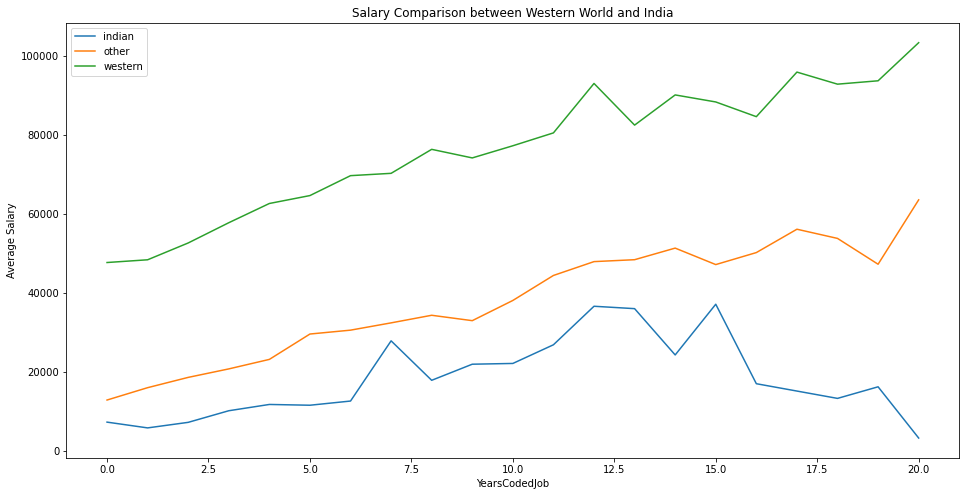

In [25]:
#Plot the Salary Comparison between Western World and india
plt.figure(figsize=(16, 8))
west_or_india_2017_comparison.groupby('west_or_india')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Western World and India");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')



Text(0, 0.5, 'Average Salary')

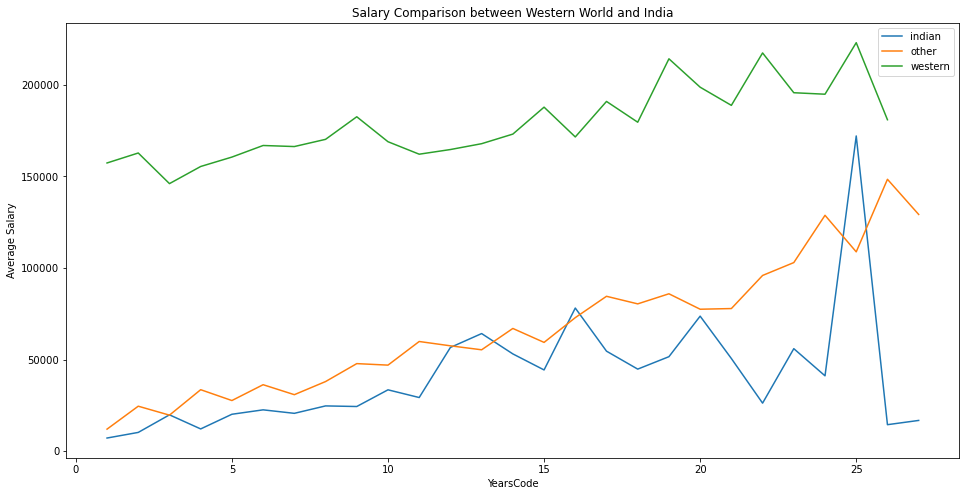

In [26]:
#Plot the Salary Comparison between Western World and india
plt.figure(figsize=(16, 8))
west_or_india_2019_comparison.groupby('west_or_india')['ConvertedComp'].plot(legend=True)
plt.title("Salary Comparison between Western World and India");
plt.xlabel('YearsCode')
plt.ylabel('Average Salary')

## Evaluation

Here you can see a programmer’s salary in the India is much lower than that in the west no matter how many years you are coding.


Since CareerSatisfaction and JobSatisfaction are only present in 2017, I am making analysis of this based on only 2017 data

In [27]:
west_or_india_2017.groupby('west_or_india').mean().CareerSatisfaction

west_or_india
indian     7.148171
other      7.450919
western    7.576207
Name: CareerSatisfaction, dtype: float64

In [28]:
west_or_india_2017.groupby('west_or_india').mean().JobSatisfaction

west_or_india
indian     6.414261
other      7.022703
western    7.122752
Name: JobSatisfaction, dtype: float64

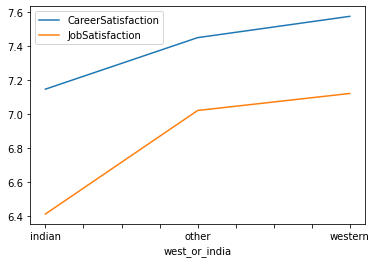

In [29]:
west_or_india_2017.groupby('west_or_india').mean().CareerSatisfaction.plot(legend=True);
west_or_india_2017.groupby('west_or_india').mean().JobSatisfaction.plot(legend=True);

After comparing the salary based on Years a programmer has been coded between the India and the western world. 

I found that the salary of an indian programmer is much lower than that of the western no matter how many years they are coded.

Finally, found that the Career and Job Satisfaction of the western programmers are much higher than those of the indian programmers.

So if you want to earn good amount of salary with Career and Job Satisfaction as you grow experience it is better to move to Western countries.

# 3. Which country has the most number of developers in last 4 years? and where does India stand in terms of total number of developers <a name="Question3"></a>


Can you guess where do you find most number of developers in the world from year 2017 to 2020?

We write a function to get a tuple with details of top 2 countries details

Plot top 2 country with most number of developers

In [30]:
def top2_country_with_most_developers(dictionary, rows):
    '''
    Function to output top 2 countries with the most number of developers.
    
    Parameters:
    dictionary : dictionary with number of developers for each country
    row: Number of total developers
    
    Return: 
    tuple : top 2 countries with the most number of developers and the value
    '''
    i = pd.Series(dictionary).nlargest(n=2)
    return i.index[0], i[0]/rows * 100,i.index[1],i[1]/rows * 100

In [31]:
# tuple with name and value of top 2 countries with the most number of developers
developers_location_2017 = top2_country_with_most_developers(df_2017['Country'].value_counts().to_dict(), df_2017['Country'].count())
developers_location_2018 = top2_country_with_most_developers(df_2018['Country'].value_counts().to_dict(), df_2018['Country'].count())
developers_location_2019 = top2_country_with_most_developers(df_2019['Country'].value_counts().to_dict(), df_2019['Country'].count())
developers_location_2020 = top2_country_with_most_developers(df_2020['Country'].value_counts().to_dict(), df_2020['Country'].count())

# developers_location_dict is dictionary with year and top 2 countries developer details
developers_location_dict = {
    '2017': developers_location_2017,
    '2018': developers_location_2018,
    '2019': developers_location_2019,
    '2020': developers_location_2020
}

developers_location_dict is dictionary with year and top 2 countries developer details.

In [32]:
developers_location_2017

('United States', 22.289461394769614, 'India', 10.112468866749689)

Create a dataframe with columns percentage of top 1 country developers,percentage of top 2nd country developers and add relevant data from developer_location_dict

In [33]:
developers_location_df=pd.DataFrame({'United States': list(map(lambda x: x[1], developers_location_dict.values())),
                                     'India': list(map(lambda x: x[3], developers_location_dict.values()))},index=list(developers_location_dict.keys()) ) 

In [34]:
developers_location_df

,United States,India
2017,22.289461,10.112469
2018,20.630212,13.938015
2019,23.604241,10.209462
2020,19.460919,13.114933


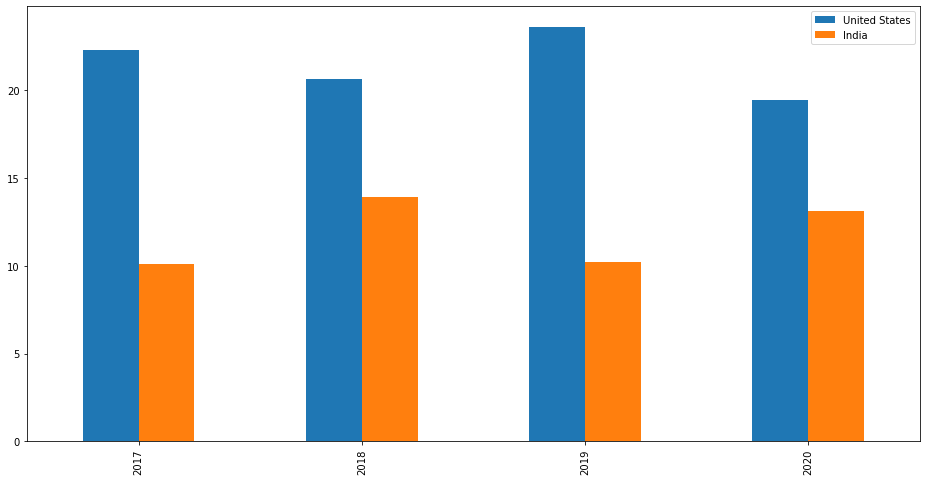

In [35]:
ax = developers_location_df.plot.bar(figsize=(16,8))

In [36]:
developers_location_dict

{'2017': ('United States', 22.289461394769614, 'India', 10.112468866749689),
 '2018': ('United States', 20.63021240717979, 'India', 13.93801489186636),
 '2019': ('United States', 23.604241078973757, 'India', 10.209462428592355),
 '2020': ('United States', 19.460918966163064, 'India', 13.114933200149832)}

## Evaluation

According to Stackoverflow, most of the developers on its platform are from United States for each year.  
And India has second most number of the developers on Stackoverflow

# 4. Will you earn more salary if you contribute to open source? <a name="Question4"></a>

To make this analysis of this question, required column are present only in 2019 dataset, so I am considering 2019 dataset for this question. 

In [37]:
# take a dataframe with only professional developer
professional_developer = df_2019[df_2019['MainBranch'] == 'I am a developer by profession']

In [38]:
# group the column based on opensourcer and convertedcomp
open_salary = professional_developer.groupby('OpenSourcer', as_index=False)['ConvertedComp'].mean()

open_salary

,OpenSourcer,ConvertedComp
0,Less than once a month but more than once per ...,129644.995906
1,Less than once per year,126725.607874
2,Never,122650.784000
3,Once a month or more often,134908.020014


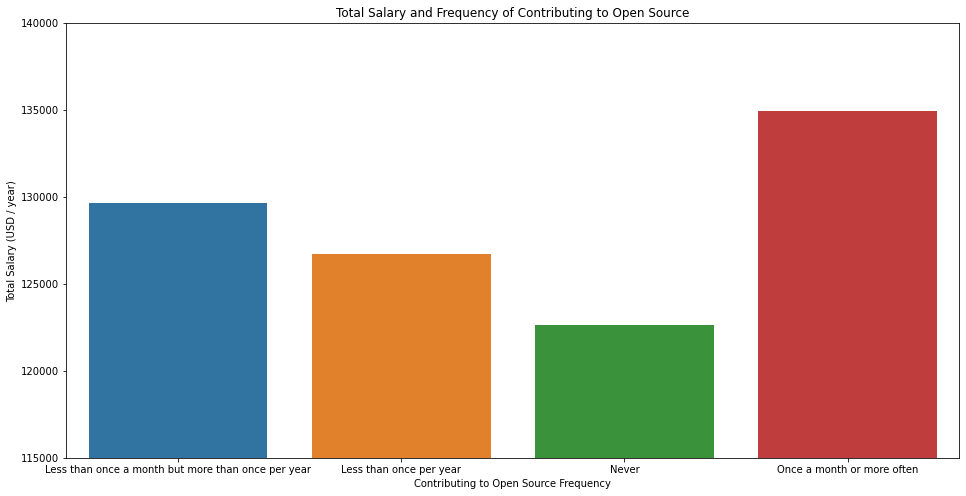

In [39]:
plt.figure(figsize=(16, 8))
sns.barplot(data=open_salary, x='OpenSourcer', y='ConvertedComp')
plt.ylim(115000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

## Evaluation

As we can see that the more you contribute to open source, Total salary earned is also increasing.

So its better to contribute to open source.